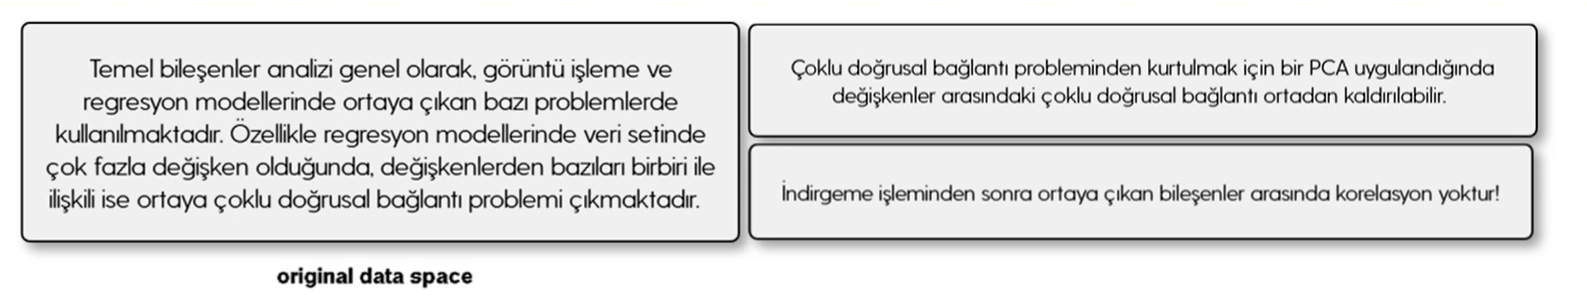

# Denetimsiz Öğrenme

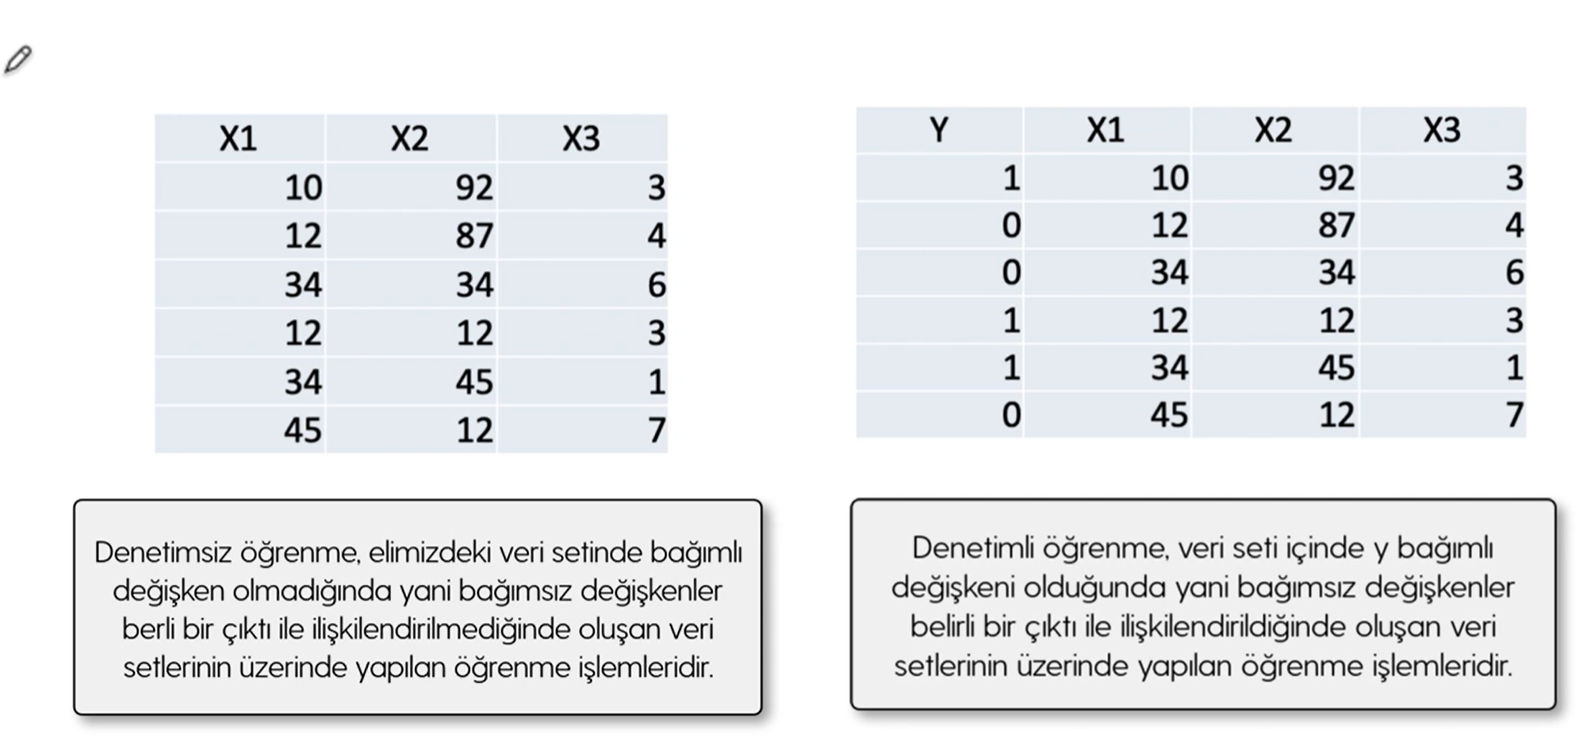

# K-Means

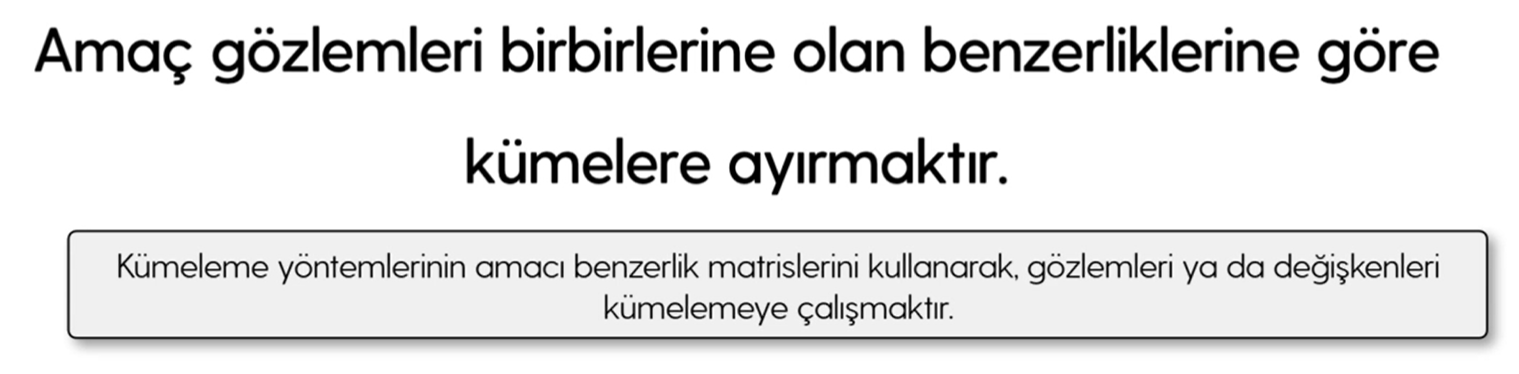

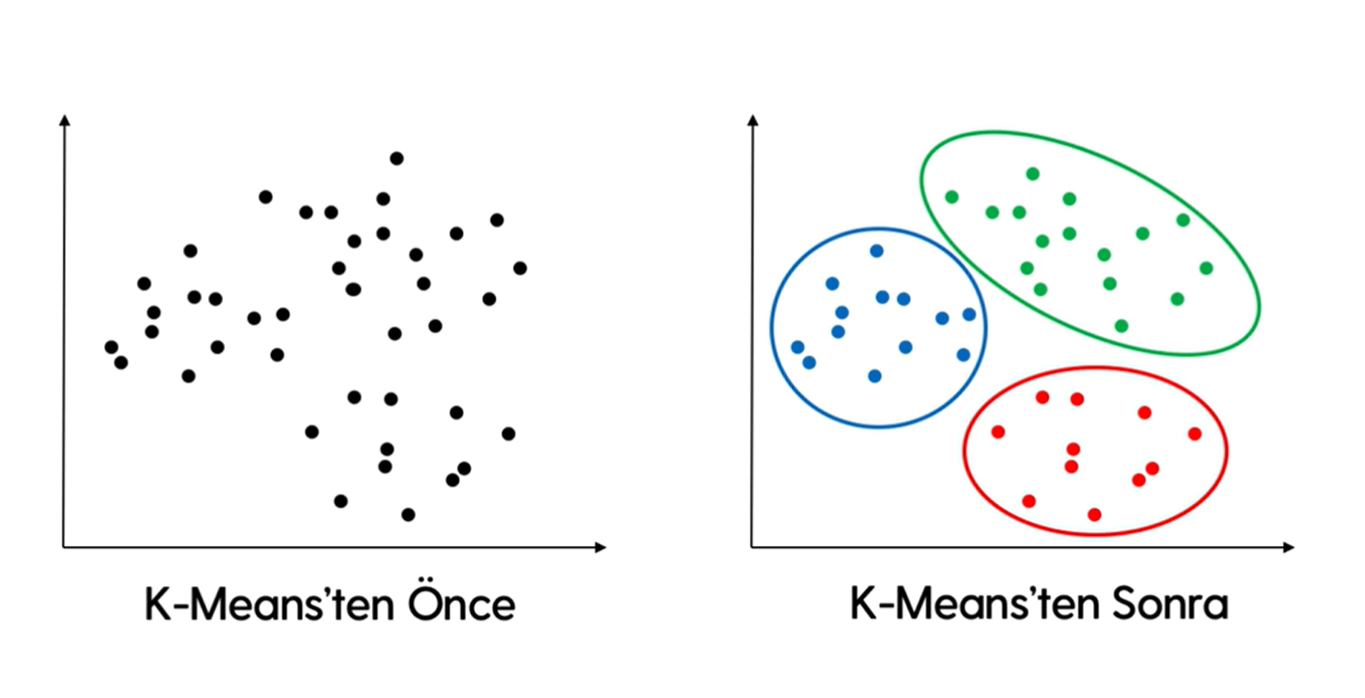

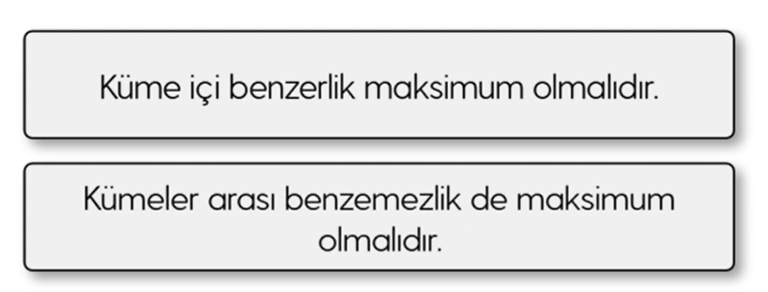

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [13]:
data = pd.read_csv(r"C:\data_set\USArrests.csv", index_col=0 )
data.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [14]:
data.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


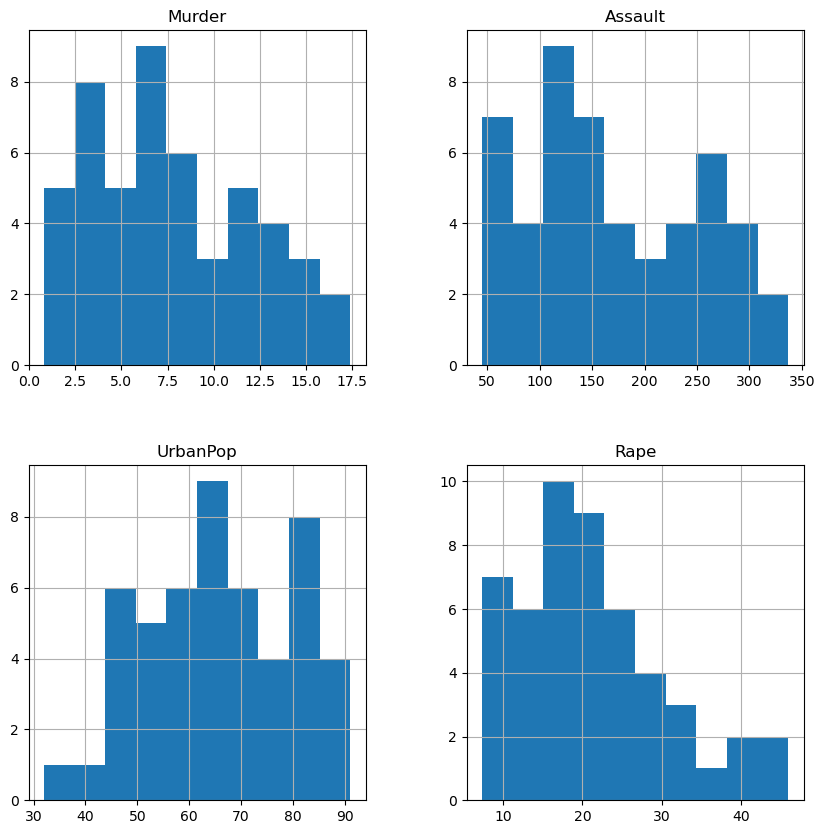

In [17]:
data.hist(figsize=(10,10));

In [18]:
kmeans= KMeans(n_clusters= 4)

In [19]:
kmeans

KMeans(n_clusters=4)

In [20]:
k_fit= kmeans.fit(data)

C:\Users\mehdi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\mehdi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\mehdi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
k_fit.n_clusters

4

In [22]:
k_fit.cluster_centers_

array([[  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714]])

In [23]:
k_fit.labels_

array([1, 1, 1, 3, 1, 3, 0, 1, 1, 3, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 3, 1,
       2, 1, 3, 0, 0, 1, 2, 3, 1, 1, 1, 2, 0, 3, 3, 0, 3, 1, 2, 3, 3, 0,
       2, 3, 3, 2, 2, 3])

In [24]:
# kümelerin görselleştirilmesi

In [25]:
k_means= KMeans(n_clusters= 2).fit(data)

C:\Users\mehdi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [26]:
kumeler= k_means.labels_

In [27]:
kumeler

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

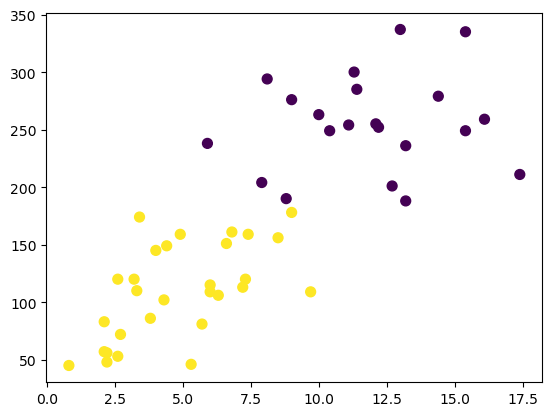

In [30]:
plt.scatter(data.iloc[:,0],data.iloc[:,1],c = kumeler, s=50, cmap= "viridis");

In [31]:
merkezler= k_means.cluster_centers_

In [32]:
merkezler

array([[ 11.85714286, 255.        ,  67.61904762,  28.11428571],
       [  4.84137931, 109.75862069,  64.03448276,  16.24827586]])

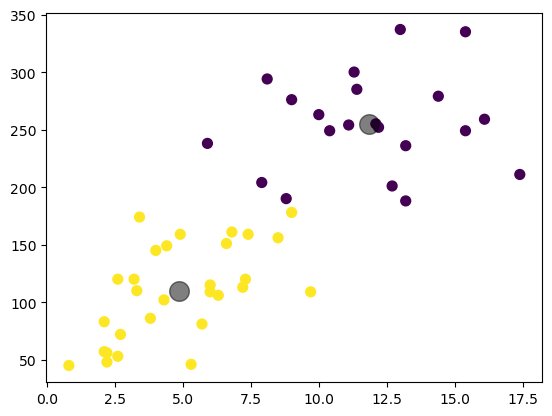

In [36]:
plt.scatter(data.iloc[:,0],data.iloc[:,1],c = kumeler, s=50, cmap= "viridis");
plt.scatter(merkezler[:,0],merkezler[:,1], c= "black", s=200, alpha=0.5);

In [44]:
# Bellek sızıntısı uyarısını bastırmak için çözüm
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [45]:
ssd= []

K= range(1,30)

for k in K:
    kmeans = KMeans(n_clusters= k).fit(data)
    ssd.append(kmeans.inertia_)

Text(0.5, 1.0, 'Optimum Küme sayısı için Elbow Yöntemi')

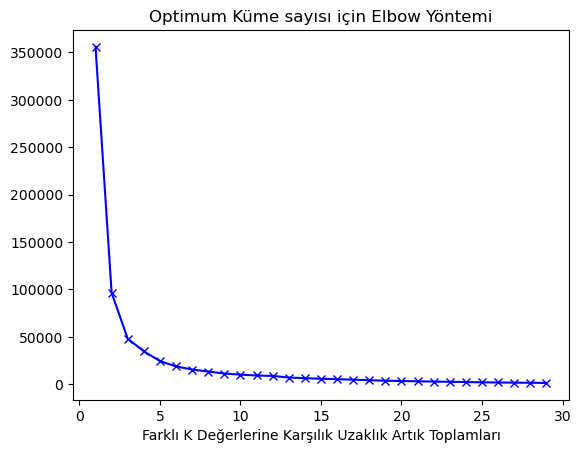

In [46]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık Uzaklık Artık Toplamları")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")

In [48]:
!pip install yellowbrick

  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/282.6 kB 220.2 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/282.6 kB 245.8 kB/s eta 0:00:01
   ----------- --------------------------- 81.9/282.6 kB 419.2 kB/s eta 0:00:01
   ---------------- --------------------- 122.9/282.6 kB 516.7 kB/s eta 0:00:01
   ---------------------- --------------- 163.8/282.6 kB 656.4 kB/s eta 0:00:01
   ---------------------- --------------- 163.8/282.6 kB 656.4 kB/s eta 0:00:01
   ------------------------------ ------- 225.3/282.6 kB 626.9 kB/s eta 0:00:01
   ------------------

In [49]:
from yellowbrick.cluster import KElbowVisualizer

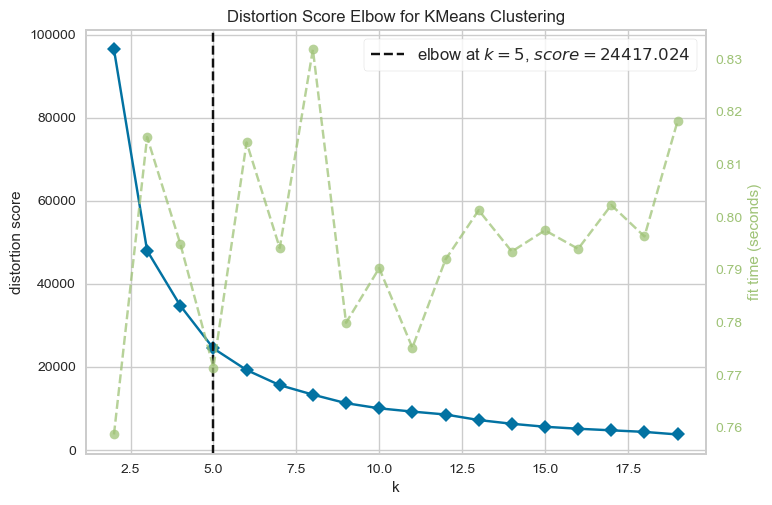

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
kmeans= KMeans()
visu= KElbowVisualizer(kmeans, k=(2,20))
visu.fit(data)
visu.poof()

In [53]:
kmeans= KMeans(n_clusters= 4).fit(data)

In [54]:
kmeans

KMeans(n_clusters=4)

In [55]:
kumeler = kmeans.labels_

In [57]:
pd.DataFrame({"Eyaletler":data.index, "Kumeler": kumeler})

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,1
7,Delaware,0
8,Florida,0
9,Georgia,2


In [58]:
data["kume_no"]= kumeler

In [59]:
data

,Murder,Assault,UrbanPop,Rape,kume_no
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,0
Georgia,17.4,211,60,25.8,2


# Hiyerarşik Kümeleme

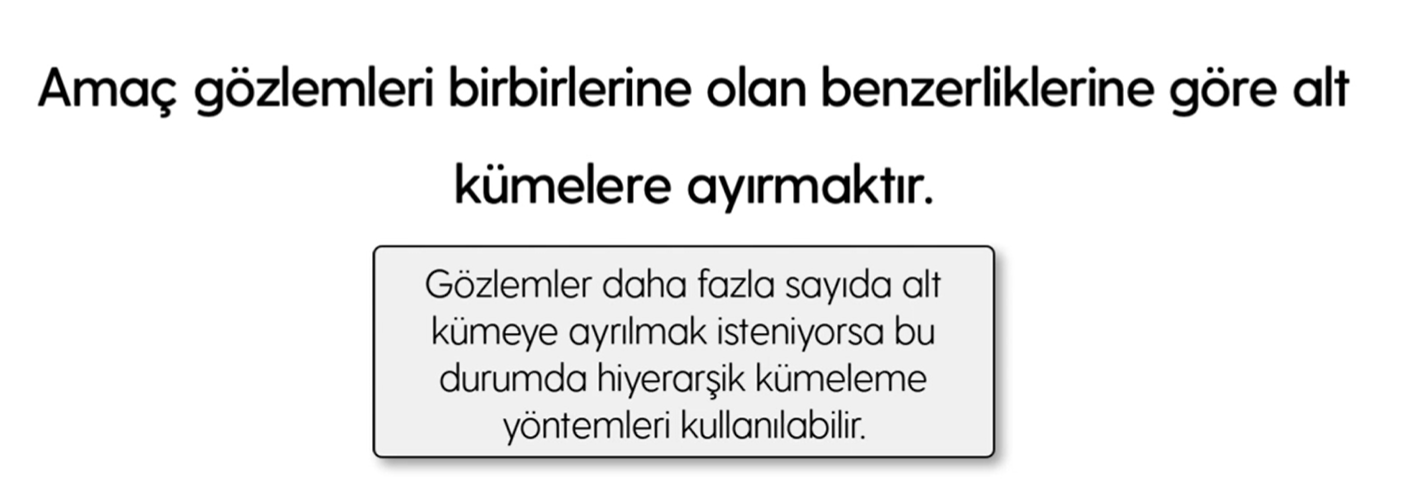

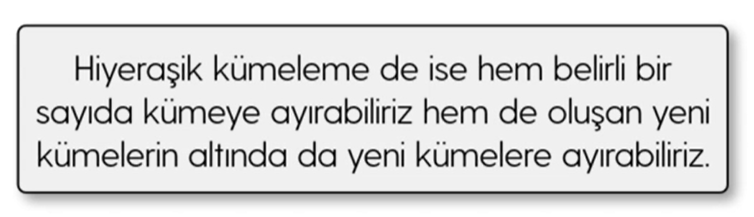

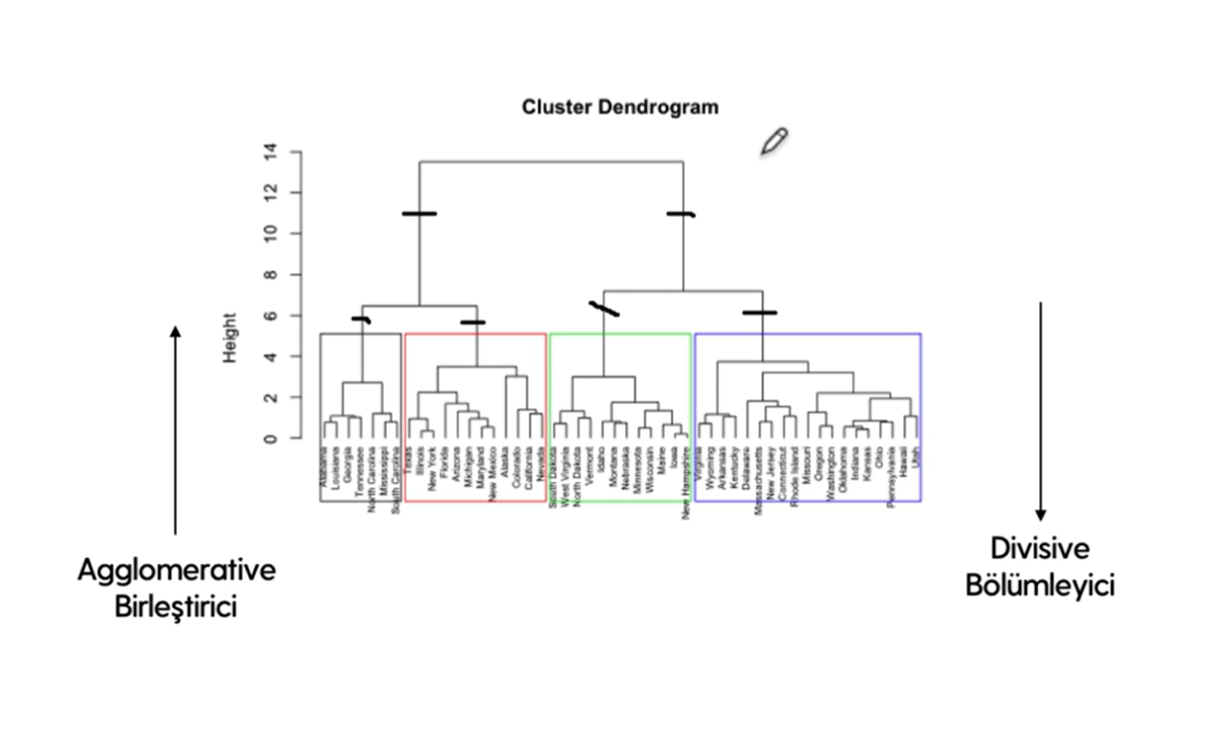

In [60]:
from scipy.cluster.hierarchy import linkage

In [67]:
hc_complete= linkage(data, "complete")
hc_average= linkage(data, "average")

In [62]:
from scipy.cluster.hierarchy import dendrogram

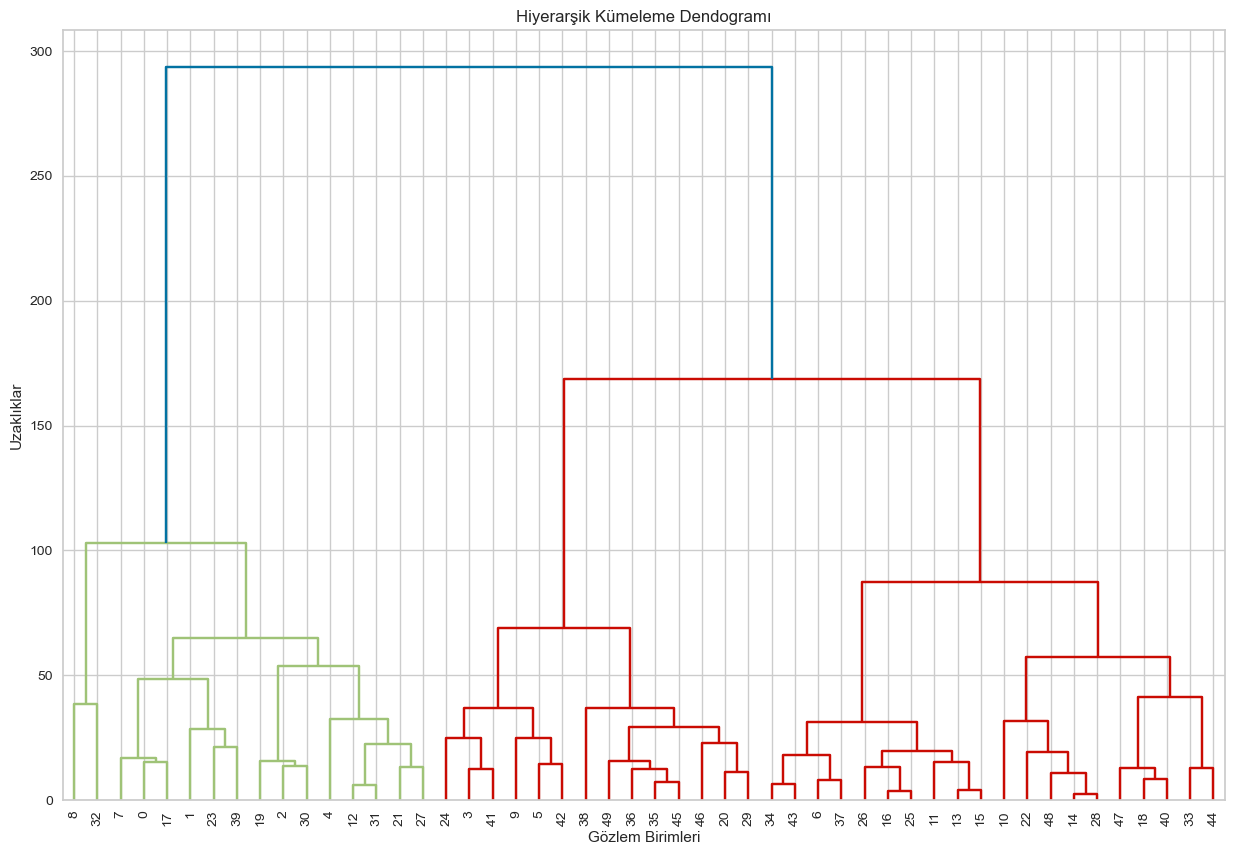

In [68]:
plt.figure(figsize=(15,10))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_complete,
          leaf_font_size= 10);

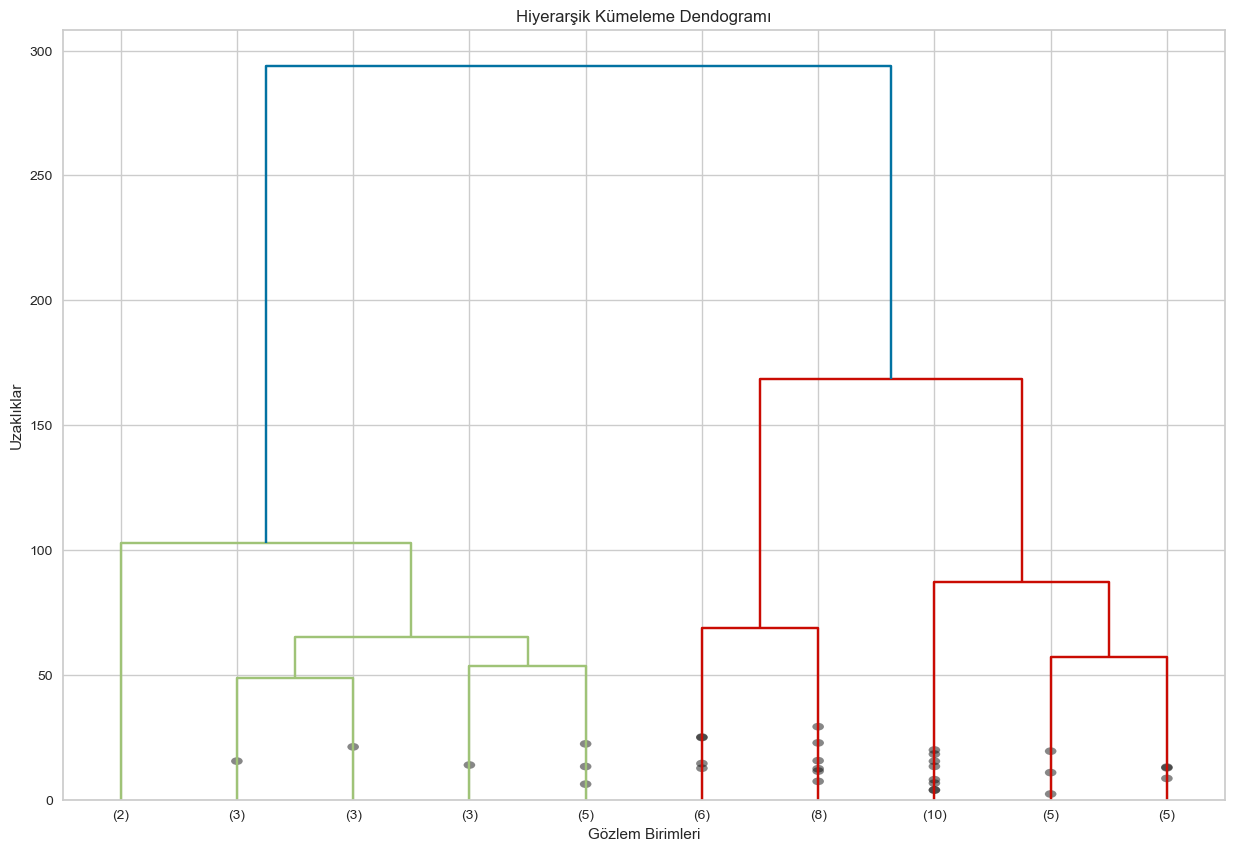

In [69]:
    plt.figure(figsize=(15,10))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_complete,
           truncate_mode = "lastp",
           p=10,
           show_contracted= True,
          leaf_font_size= 10);

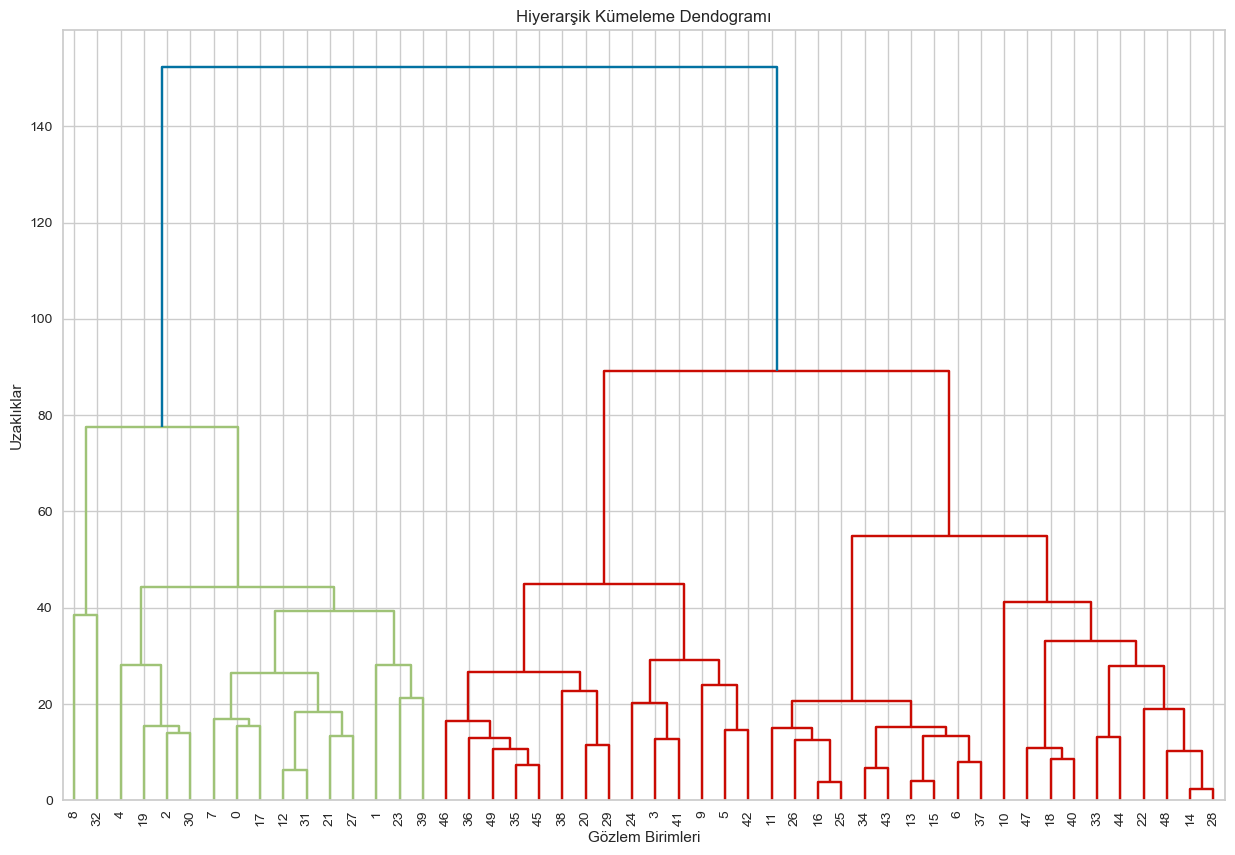

In [70]:
plt.figure(figsize=(15,10))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
          leaf_font_size= 10);

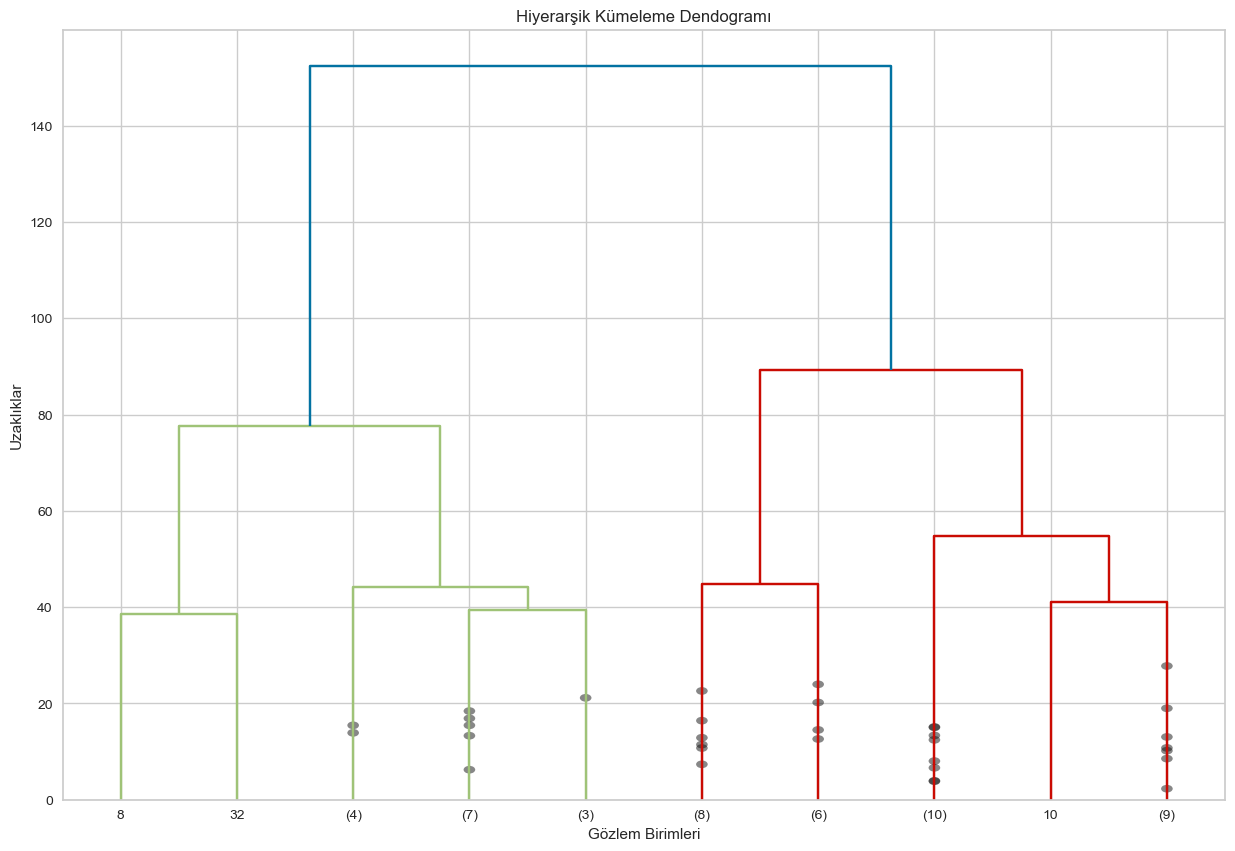

In [71]:
plt.figure(figsize=(15,10))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           truncate_mode = "lastp",
           p=10,
           show_contracted= True,
          leaf_font_size= 10);

# Temel Bileşen Analizi (PCA)

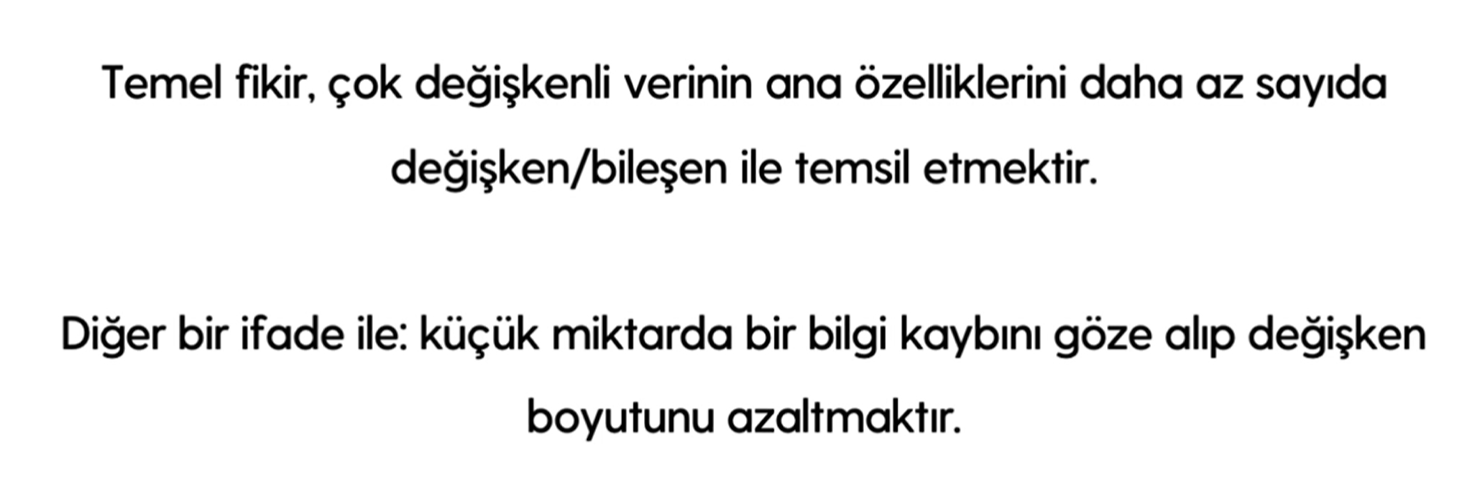

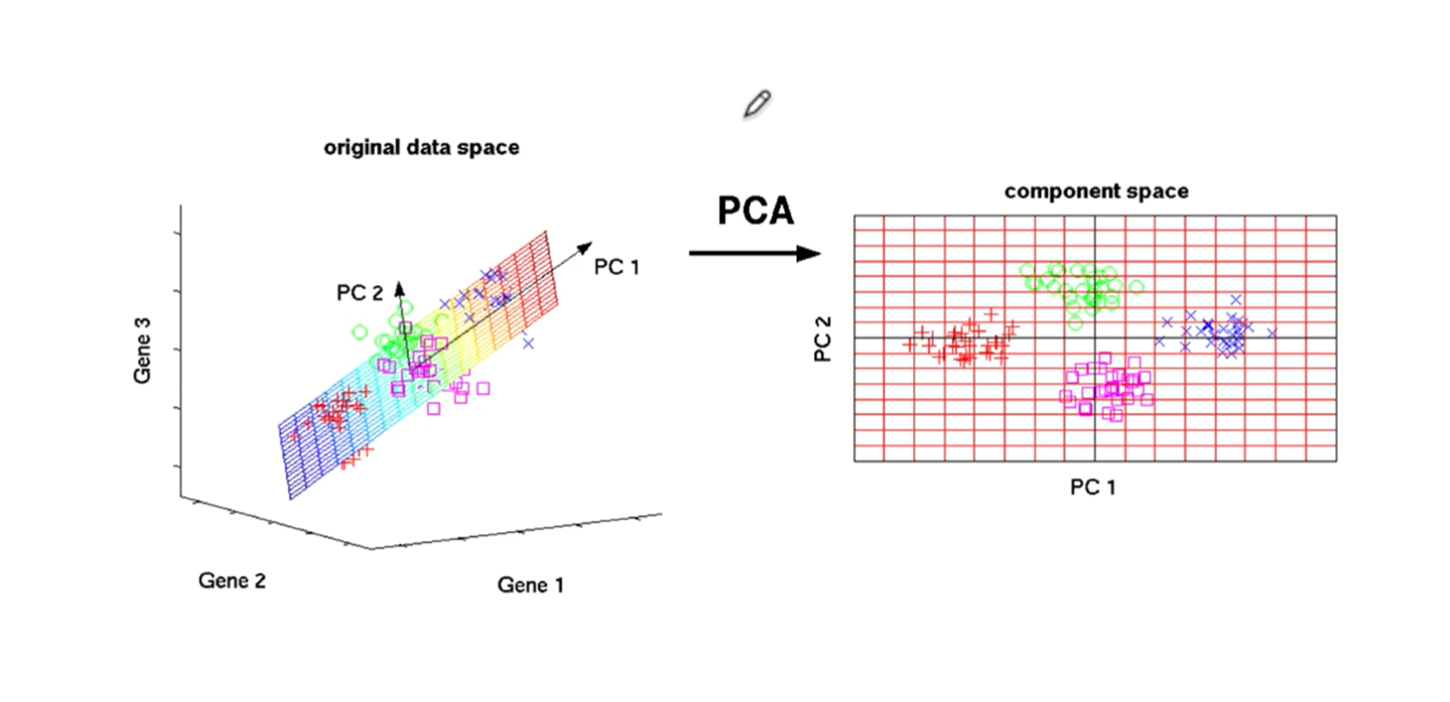

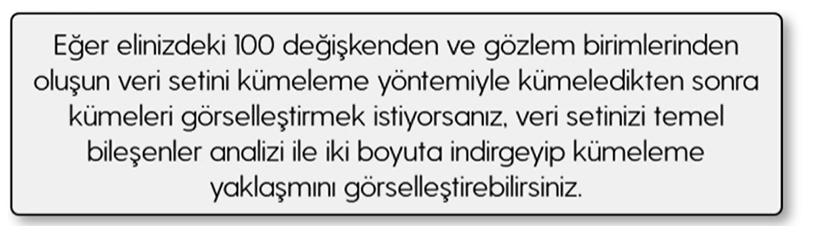

In [78]:
data = pd.read_csv(r"C:\data_set\Hitters.csv")
data.dropna(inplace= True)
data = data._get_numeric_data()
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [74]:
from sklearn.preprocessing import StandardScaler

In [80]:
data= StandardScaler().fit_transform(data) #standartlaşma yapıldı

In [81]:
from sklearn.decomposition import PCA

In [82]:
pca = PCA(n_components= 2)
pca_fit= pca.fit_transform(data)

In [83]:
bilesen_df = pd.DataFrame(data = pca_fit, columns = ["birinci_bilesen","ikinci_bilesen"])

In [84]:
bilesen_df

,birinci_bilesen,ikinci_bilesen
0,0.076848,1.653525
1,0.337127,-2.320560
2,3.408362,0.755757
3,-2.642221,-0.361486
4,1.071681,-1.511674
...,...,...
258,-0.152111,-0.331665
259,3.241373,-0.391942
260,-1.206322,-0.625714
261,2.084856,-2.059851


In [87]:
pca.explained_variance_ratio_ # açıklandırma oranı

array([0.45245466, 0.24246801])

In [88]:
pca.components_

array([[ 0.19506377,  0.19410007,  0.19690453,  0.19491272,  0.22956638,
         0.20673717,  0.271085  ,  0.31970454,  0.32077315,  0.30810145,
         0.32761493,  0.32977446,  0.30573146,  0.08303783,  0.00159189,
        -0.00529271,  0.24914187],
       [-0.38407792, -0.37764493, -0.22866298, -0.37459128, -0.31026531,
        -0.23115759,  0.26820405,  0.19641268,  0.18589726,  0.13386448,
         0.17692929,  0.17283361,  0.19698297, -0.16295204, -0.17624626,
        -0.20978299, -0.05452611]])

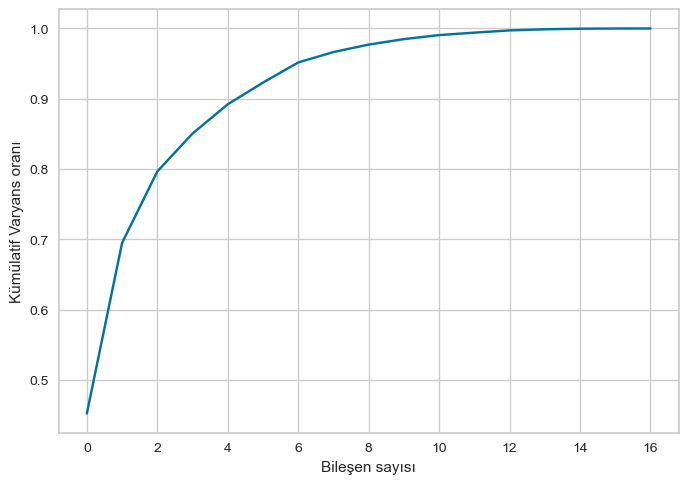

In [91]:
# optimum bilesen sayisi
pca = PCA().fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen sayısı")
plt.ylabel("Kümülatif Varyans oranı");

In [92]:
pca.explained_variance_ratio_

array([4.52454661e-01, 2.42468012e-01, 1.01696801e-01, 5.39343967e-02,
       4.16143455e-02, 3.08119274e-02, 2.86933912e-02, 1.47589096e-02,
       1.06379741e-02, 7.78968542e-03, 5.72654636e-03, 3.49183444e-03,
       3.16734133e-03, 1.57268674e-03, 8.27965421e-04, 2.82821576e-04,
       7.06999352e-05])

In [93]:
# final
pca = PCA(n_components= 3)
pca_fit= pca.fit_transform(data)

In [94]:
pca.explained_variance_ratio_

array([0.45245466, 0.24246801, 0.1016968 ])